# Import Python Libraries

In [1]:
import numpy as np
import time
import random

In [2]:
from sklearn.ensemble import RandomForestClassifier 
import sklearn.metrics as metrics

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

print( tf.__version__ )

2.15.0


# FASHION data

In [4]:
# Loan in Fashion Data
mnist = tf.keras.datasets.fashion_mnist # 28x28 Fashion Image Data

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]


# NUMBER data

In [5]:
#Load in Data
# mnist = tf.keras.datasets.mnist # 28x28 Handwritten Digits 0-9

In [6]:


(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the Data
#x_train = tf.keras.utils.normalize( x_train, axis=1 )
#x_test = tf.keras.utils.normalize( x_test, axis=1 )

x_train = x_train / 255 
x_test = x_test / 255 



In [7]:

print( type( x_train ) )
print( x_train.shape )

print( type( y_train ) )
print( y_train.shape )


<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)


In [8]:
INPUT_SHAPE = x_train[0].shape
print("Shape = ", INPUT_SHAPE )

TOTAL_SIZE = INPUT_SHAPE[0] * INPUT_SHAPE[1]
print("TOTAL SIZE = ", TOTAL_SIZE)


Shape =  (28, 28)
TOTAL SIZE =  784


In [9]:
def getRandomIndex( DATA ) :
    return random.randint(0, DATA.shape[0] )

who= 5602
7


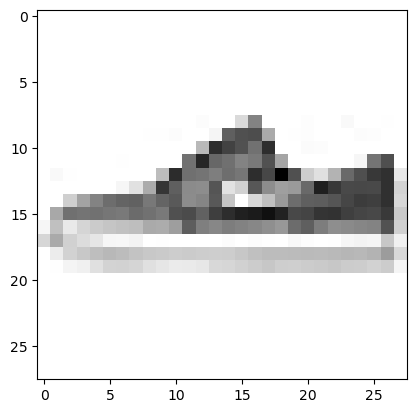

In [10]:

who=0
who=getRandomIndex( x_train )

print("who=", who)

print( y_train[who])
#print( x_train[who])
plt.imshow(x_train[who], plt.cm.binary) 
#plt.imshow(x_train[who] ) 


# SOLVE USING RANDOM FORESTS

In [11]:
new_x_train = []
for i in x_train :
    new_x_train.append( i.flatten() )
new_x_train = np.array( new_x_train )

new_x_test = []
for i in x_test :
    new_x_test.append( i.flatten() )
new_x_test = np.array( new_x_test )

print( x_train.shape )
print( new_x_train.shape )

(60000, 28, 28)
(60000, 784)


In [12]:
print("This might take a while ... maybe 15+ minutes ...depends on your computer.")
start_time = time.time()

theTrees = int( 2*TOTAL_SIZE )

clf = RandomForestClassifier( n_estimators = theTrees )
clf.fit( new_x_train, y_train )

Time_In_Seconds = round( time.time()-start_time, 0 )
Time_In_Minutes = round( Time_In_Seconds / 60, 1 )
print("Execution Time In Seconds = ", Time_In_Seconds )
print("Execution Time In Minutes = ", Time_In_Minutes )


This might take a while ... maybe 15+ minutes ...depends on your computer.
Execution Time In Seconds =  885.0
Execution Time In Minutes =  14.8


In [13]:
pred_train = clf.predict( new_x_train )
print( pred_train[0] )
RF_acc_train = metrics.accuracy_score(y_train, pred_train )
print( "train accuracy", RF_acc_train )

pred_test = clf.predict( new_x_test )
print( pred_test[0] )
RF_acc = metrics.accuracy_score(y_test, pred_test )
print( "test accuracy", RF_acc )


9
train accuracy 1.0
9
test accuracy 0.8784


# SOLVE USING TENSOR FLOW NEURAL NETWORKS

In [24]:
theEpochs = 1000

theActivation = tf.keras.activations.relu


units_01 = int( 2*TOTAL_SIZE )
units_02 = units_01

DENSE_LAYER_01 = tf.keras.layers.Dense( units=units_01, activation=theActivation )
DENSE_LAYER_02 = tf.keras.layers.Dense( units=units_02, activation=theActivation )
DENSE_LAYER_XX = tf.keras.layers.Dense(10, activation=tf.nn.softmax )

DROPOUT_LAYER = tf.keras.layers.Dropout( 0.2 )


theOptimizer = tf.keras.optimizers.Adam()
theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()

theSplit = 0.2
theBatchSize = 32
verboseFlag = True

theTensorFlowSaveFile = "TF_Fashion_Model"

In [25]:

# Build the Model

print("This might take a while ... maybe 15+ minutes ...depends on your computer.")
start_time = time.time()

model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Flatten( input_shape=INPUT_SHAPE ) )
model.add( DENSE_LAYER_01 )
model.add( DROPOUT_LAYER )
model.add( DENSE_LAYER_02 )
model.add( DENSE_LAYER_XX )
#model.compile( optimizer=theOptimizer, loss=theLossMetric )
model.compile( optimizer=theOptimizer, loss=theLossMetric, metrics=['accuracy'] )
#model.fit(x_train, y_train, epochs=theEpochs, verbose = verboseFlag )
model.fit(x_train, y_train, epochs=theEpochs, validation_split=theSplit, batch_size=theBatchSize, verbose = verboseFlag )


Time_In_Seconds = round( time.time()-start_time, 0 )
Time_In_Minutes = round( Time_In_Seconds / 60, 1 )
print("Execution Time In Seconds = ", Time_In_Seconds )
print("Execution Time In Minutes = ", Time_In_Minutes )



This might take a while ... maybe 15+ minutes ...depends on your computer.
Epoch 1/1000
1500/1500 [==============================] - 13s 9ms/step - loss: 0.5112 - accuracy: 0.8123 - val_loss: 0.4381 - val_accuracy: 0.8433
Epoch 2/1000
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3978 - accuracy: 0.8537 - val_loss: 0.3868 - val_accuracy: 0.8590
Epoch 3/1000
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3627 - accuracy: 0.8655 - val_loss: 0.3759 - val_accuracy: 0.8583
Epoch 4/1000
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3427 - accuracy: 0.8735 - val_loss: 0.3475 - val_accuracy: 0.8712
Epoch 5/1000
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3212 - accuracy: 0.8795 - val_loss: 0.3915 - val_accuracy: 0.8629
Epoch 6/1000
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3100 - accuracy: 0.8852 - val_loss: 0.3588 - val_accuracy: 0.8739
Epoch 7/1000
1500/1500 [===================

In [26]:
probs = model.predict( x_test )

pred_list = []
for p in probs :
    pred_list.append( np.argmax( p ) )
pred = np.array( pred_list )
acc_score = metrics.accuracy_score( y_test, pred)

for i in range(100) :
    who = getRandomIndex( x_test )
    print("WHO = ", who, " Predicte =", pred[who], " Actual = ", y_test[who] )

print(" --------- ")
print("accuracy = ", acc_score)


313/313 [==============================] - 1s 2ms/step
WHO =  4057  Predicte = 5  Actual =  5
WHO =  6813  Predicte = 7  Actual =  7
WHO =  8735  Predicte = 1  Actual =  1
WHO =  4628  Predicte = 0  Actual =  0
WHO =  5036  Predicte = 3  Actual =  4
WHO =  5768  Predicte = 3  Actual =  3
WHO =  8  Predicte = 5  Actual =  5
WHO =  9103  Predicte = 1  Actual =  1
WHO =  9477  Predicte = 4  Actual =  4
WHO =  1663  Predicte = 5  Actual =  5
WHO =  8583  Predicte = 7  Actual =  7
WHO =  1992  Predicte = 1  Actual =  1
WHO =  8118  Predicte = 8  Actual =  8
WHO =  9098  Predicte = 1  Actual =  1
WHO =  1576  Predicte = 2  Actual =  2
WHO =  5761  Predicte = 1  Actual =  1
WHO =  3164  Predicte = 2  Actual =  2
WHO =  2353  Predicte = 8  Actual =  8
WHO =  8418  Predicte = 0  Actual =  0
WHO =  4974  Predicte = 1  Actual =  1
WHO =  7166  Predicte = 9  Actual =  9
WHO =  7282  Predicte = 4  Actual =  4
WHO =  2937  Predicte = 1  Actual =  1
WHO =  4444  Predicte = 3  Actual =  3
WHO =  930  

In [27]:
NN_loss, NN_acc = model.evaluate( x_test, y_test )
print("loss=",NN_loss)
print("accuracy",NN_acc)

313/313 [==============================] - 1s 2ms/step - loss: 4.1923 - accuracy: 0.8938
loss= 4.192263126373291
accuracy 0.8938000202178955


In [28]:
model.save( theTensorFlowSaveFile )

INFO:tensorflow:Assets written to: TF_Fashion_Model/assets


INFO:tensorflow:Assets written to: TF_Fashion_Model/assets


In [29]:
new_model= tf.keras.models.load_model( theTensorFlowSaveFile )

In [30]:
predictions = new_model.predict( x_test ) 

313/313 [==============================] - 1s 2ms/step


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
predict= 8 actual= 8


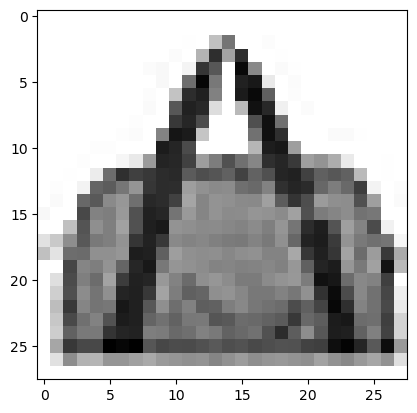

In [31]:
who=getRandomIndex( x_test )
print( predictions[who]) # probability score
result = np.argmax( list(predictions[who]) )
print("predict=",result,"actual=",y_test[who])
plt.imshow( x_test[who], plt.cm.binary )
#plt.show()

# Accuracy of RANDOM FOREST and NEURAL NETWORK

In [35]:
print("RF accuracy", round(RF_acc,1) )
print("NN accuracy",round(NN_acc,1))

RF accuracy 0.9
NN accuracy 0.9


In [1]:
!jupyter nbconvert --to pdf 99_minist_fashion_Kwok.ipynb

[NbConvertApp] Converting notebook 99_minist_fashion_Kwok.ipynb to pdf
[NbConvertApp] Support files will be in 99_minist_fashion_Kwok_files/
[NbConvertApp] Making directory ./99_minist_fashion_Kwok_files
[NbConvertApp] Writing 198973 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 121297 bytes to 99_minist_fashion_Kwok.pdf
